# 0. Import

In [ ]:
! pip install -U sentence-transformers
! pip install sentencepiece
! pip install hdbscan
! pip install funcy pickle5

In [ ]:
import pandas as pd
import numpy as np
import re
import time
import random
import collections
import pickle
# S-BERT
from sentence_transformers import SentenceTransformer
# Clustering
import hdbscan
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset(MovieLens)

In [ ]:
df = pd.read_csv('./data/movies_metadata.csv', usecols = ['title', 'vote_average', 'overview'])

# Remove Noise data
df = df.dropna(how='any')

# Text Preprocessing
def clean_text(text):
    text = str(text)
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    return text
df['overview'] = df['overview'].apply(lambda x: clean_text(x))

# Make index for clustering
df['id'] = df.index
print("Total Movie's rows(Data Size) : ",len(df))
data = df.overview.tolist()

df.tail()

Total Movie's rows(Data Size) :  44506


,overview,title,vote_average,id
45461,rising and falling between a man and woman,Subdue,4.0,45461
45462,an artist struggles to finish his work while a...,Century of Birthing,9.0,45462
45463,when one of her hits goes wrong a professional...,Betrayal,3.8,45463
45464,in a small town live two brothers one a minist...,Satan Triumphant,0.0,45464
45465,years after decriminalisation of homosexuality...,Queerama,0.0,45465


# 2. Other Clustering Embeddings Methods
    - 1) K-Means
    - 2) Agglomerative Clustering
    - 3) DBSCAN
    - 4) HDBSCAN

In [ ]:
# Sentence-BERT
model_path = 'all-MiniLM-L6-v2'
# Embedding model
model = SentenceTransformer(model_path)

#####################
# Famous Clustering #
#####################
## K-MEANS ##
def KMEANS_time(embeddings):
    # Time check
    start = time.time()
    # Clustering with KMEANS    
    cluster = KMeans(n_clusters=50, random_state=0).fit(embeddings)
    end = time.time()
    time_check = round((end-start), 4)
    print(">> KMEANS Calculate run time : {} sec".format(time_check))
    return time_check

## Agglomerative ##
def Agglomerative_time(embeddings):
    # Time check
    start = time.time()
    # Normalize the embeddings to unit length
    embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
    # Clustering with Agglomerative Clustering   
    cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5).fit(embeddings)
    end = time.time()
    time_check = round((end-start), 4)
    print(">> Agglomerative Calculate run time : {} sec".format(time_check))
    return time_check

## DBSCAN ##
def DBSCAN_time(embeddings):
    # Time check
    start = time.time()
    # Clustering with DBSCAN(eps : Maximum distance between two samples)
    cluster = DBSCAN(eps=1.0, min_samples=15).fit(embeddings)
    end = time.time()
    time_check = round((end-start), 4)
    print(">> DBSCAN Calculate run time : {} sec".format(time_check))
    return time_check

## HDBSCAN ##
def HDBSCAN_time(embeddings):
    # Time check
    start = time.time()
    # Clustering with HDBSCAN
    cluster = hdbscan.HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom').fit(embeddings)
    end = time.time()
    time_check = round((end-start), 4)
    print(">> HDBSCAN Calculate run time : {} sec \n".format(time_check))
    return time_check

# Clustering Results
time_dict = {'KMEAN' : [], 'Agglomerative' : [], 'DBSCAN' : [], 'HDBSCAN' : []}
for num_cluster in range(1000, 16001, 1000):
    data_size = data[:num_cluster] # Cluster Size
    # Sentence Embedding
    embeddings = model.encode(data_size, show_progress_bar=False)
    # Append time
    time_dict['KMEAN'].append(KMEANS_time(embeddings))
    time_dict['Agglomerative'].append(Agglomerative_time(embeddings))
    time_dict['DBSCAN'].append(DBSCAN_time(embeddings))
    time_dict['HDBSCAN'].append(HDBSCAN_time(embeddings))

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

>> KMEANS Calculate run time : 1.6781 sec
>> Agglomerative Calculate run time : 0.1795 sec
>> DBSCAN Calculate run time : 0.0491 sec
>> HDBSCAN Calculate run time : 0.9637 sec 

>> KMEANS Calculate run time : 3.673 sec
>> Agglomerative Calculate run time : 0.6795 sec
>> DBSCAN Calculate run time : 0.1169 sec
>> HDBSCAN Calculate run time : 3.6576 sec 

>> KMEANS Calculate run time : 5.663 sec
>> Agglomerative Calculate run time : 1.5341 sec
>> DBSCAN Calculate run time : 0.2266 sec
>> HDBSCAN Calculate run time : 8.1273 sec 

>> KMEANS Calculate run time : 8.4534 sec
>> Agglomerative Calculate run time : 2.7543 sec
>> DBSCAN Calculate run time : 0.3965 sec
>> HDBSCAN Calculate run time : 14.2964 sec 

>> KMEANS Calculate run time : 10.3798 sec
>> Agglomerative Calculate run time : 4.3866 sec
>> DBSCAN Calculate run time : 0.6159 sec
>> HDBSCAN Calculate run time : 22.2446 sec 

>> KMEANS Calculate run time : 13.7627 sec
>> Agglomerative Calculate run time : 6.3361 sec
>> DBSCAN Calcula

# 3. Parallel Clustering

In [ ]:
from models.parallel_topic_model import *

my_model = 'all-MiniLM-L6-v2'
target_column = 'overview'

In [ ]:
parallel_time = []
for num_cluster in range(1000, 16001, 1000):
    df = df[:num_cluster]
    cluster = ParallelCluster(dataframe = df, tgt_col = target_column, model_name = my_model, use_sentence_bert = True)
    # Time check
    start = time.time()
    clusters, unclusters= cluster.parallel_cluster(clusters = None, threshold = 0.49, page_size = 500, iterations = 5)
    end = time.time()
    time_check = round((end-start), 4)
    print(">> Parallel Clustering Calculate run time : {} sec \n".format(time_check))
    parallel_time.append(time_check)

time_dict['Parallel'] = parallel_time

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  20
>> Percentage clusted Doc Embeddings : 11.90%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  29
>> Percentage clusted Doc Embeddings : 15.30%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  31
>> Percentage clusted Doc Embeddings : 16.00%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  34
>> Percentage clusted Doc Embeddings : 16.90%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  35
>> Percentage clusted Doc Embeddings : 17.20%


>> Parallel Clustering Calculate run time : 0.138 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  19
>> Percentage clusted Doc Embeddings : 11.10%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  28
>> Percentage clusted Doc Embeddings : 14.90%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  32
>> Percentage clusted Doc Embeddings : 16.10%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  38
>> Percentage clusted Doc Embeddings : 17.90%


=== Iteration 5 / 5 ===


*** Precautions! Reduce the number of Iterations or the Threshold! ***
>> Number of Total Clusters :  38
>> Percentage clusted Doc Embeddings : 17.90%


>> Parallel Clustering Calculate run time : 0.1484 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  21
>> Percentage clusted Doc Embeddings : 12.50%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  32
>> Percentage clusted Doc Embeddings : 16.60%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  36
>> Percentage clusted Doc Embeddings : 17.80%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  40
>> Percentage clusted Doc Embeddings : 19.10%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  41
>> Percentage clusted Doc Embeddings : 19.40%


>> Parallel Clustering Calculate run time : 0.1352 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  19
>> Percentage clusted Doc Embeddings : 11.90%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  25
>> Percentage clusted Doc Embeddings : 14.00%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  31
>> Percentage clusted Doc Embeddings : 16.10%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  34
>> Percentage clusted Doc Embeddings : 17.00%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  36
>> Percentage clusted Doc Embeddings : 17.60%


>> Parallel Clustering Calculate run time : 0.1503 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  22
>> Percentage clusted Doc Embeddings : 11.00%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  29
>> Percentage clusted Doc Embeddings : 14.20%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  34
>> Percentage clusted Doc Embeddings : 16.50%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  40
>> Percentage clusted Doc Embeddings : 18.50%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  43
>> Percentage clusted Doc Embeddings : 19.50%


>> Parallel Clustering Calculate run time : 0.1452 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  24
>> Percentage clusted Doc Embeddings : 11.60%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  30
>> Percentage clusted Doc Embeddings : 14.10%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  40
>> Percentage clusted Doc Embeddings : 17.40%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  44
>> Percentage clusted Doc Embeddings : 18.70%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  46
>> Percentage clusted Doc Embeddings : 19.30%


>> Parallel Clustering Calculate run time : 0.1447 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  25
>> Percentage clusted Doc Embeddings : 13.20%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  31
>> Percentage clusted Doc Embeddings : 15.40%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  37
>> Percentage clusted Doc Embeddings : 17.30%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  40
>> Percentage clusted Doc Embeddings : 18.20%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  43
>> Percentage clusted Doc Embeddings : 19.10%


>> Parallel Clustering Calculate run time : 0.1686 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  24
>> Percentage clusted Doc Embeddings : 11.10%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  35
>> Percentage clusted Doc Embeddings : 15.50%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  42
>> Percentage clusted Doc Embeddings : 17.80%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  44
>> Percentage clusted Doc Embeddings : 18.60%


=== Iteration 5 / 5 ===


*** Precautions! Reduce the number of Iterations or the Threshold! ***
>> Number of Total Clusters :  44
>> Percentage clusted Doc Embeddings : 18.60%


>> Parallel Clustering Calculate run time : 0.1525 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  22
>> Percentage clusted Doc Embeddings : 10.00%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  33
>> Percentage clusted Doc Embeddings : 14.60%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  38
>> Percentage clusted Doc Embeddings : 16.50%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  42
>> Percentage clusted Doc Embeddings : 17.70%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  43
>> Percentage clusted Doc Embeddings : 18.00%


>> Parallel Clustering Calculate run time : 0.1431 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  23
>> Percentage clusted Doc Embeddings : 11.90%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  29
>> Percentage clusted Doc Embeddings : 14.30%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  38
>> Percentage clusted Doc Embeddings : 17.50%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  41
>> Percentage clusted Doc Embeddings : 18.40%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  42
>> Percentage clusted Doc Embeddings : 18.70%


>> Parallel Clustering Calculate run time : 0.1413 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  19
>> Percentage clusted Doc Embeddings : 11.20%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  35
>> Percentage clusted Doc Embeddings : 16.70%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  38
>> Percentage clusted Doc Embeddings : 17.80%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  42
>> Percentage clusted Doc Embeddings : 19.10%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  44
>> Percentage clusted Doc Embeddings : 19.70%


>> Parallel Clustering Calculate run time : 0.1391 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  21
>> Percentage clusted Doc Embeddings : 12.70%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  27
>> Percentage clusted Doc Embeddings : 15.30%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  33
>> Percentage clusted Doc Embeddings : 17.40%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  34
>> Percentage clusted Doc Embeddings : 17.70%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  35
>> Percentage clusted Doc Embeddings : 18.10%


>> Parallel Clustering Calculate run time : 0.1393 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  23
>> Percentage clusted Doc Embeddings : 12.80%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  33
>> Percentage clusted Doc Embeddings : 16.00%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  39
>> Percentage clusted Doc Embeddings : 18.00%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  41
>> Percentage clusted Doc Embeddings : 18.60%


=== Iteration 5 / 5 ===


*** Precautions! Reduce the number of Iterations or the Threshold! ***
>> Number of Total Clusters :  41
>> Percentage clusted Doc Embeddings : 18.60%


>> Parallel Clustering Calculate run time : 0.3315 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  18
>> Percentage clusted Doc Embeddings : 10.80%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  30
>> Percentage clusted Doc Embeddings : 15.50%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  34
>> Percentage clusted Doc Embeddings : 16.90%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  38
>> Percentage clusted Doc Embeddings : 18.20%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  40
>> Percentage clusted Doc Embeddings : 18.90%


>> Parallel Clustering Calculate run time : 0.1507 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  29
>> Percentage clusted Doc Embeddings : 14.70%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  36
>> Percentage clusted Doc Embeddings : 17.00%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  38
>> Percentage clusted Doc Embeddings : 17.60%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  40
>> Percentage clusted Doc Embeddings : 18.20%


=== Iteration 5 / 5 ===


>> Number of Total Clusters :  42
>> Percentage clusted Doc Embeddings : 18.90%


>> Parallel Clustering Calculate run time : 0.139 sec 



Batches:   0%|          | 0/32 [00:00<?, ?it/s]

>> Data embeddings shape(Items x Dimensionality) : (1000, 384)
=== Iteration 1 / 5 ===


>> Number of Total Clusters :  21
>> Percentage clusted Doc Embeddings : 10.30%


=== Iteration 2 / 5 ===


>> Number of Total Clusters :  32
>> Percentage clusted Doc Embeddings : 16.70%


=== Iteration 3 / 5 ===


>> Number of Total Clusters :  36
>> Percentage clusted Doc Embeddings : 18.00%


=== Iteration 4 / 5 ===


>> Number of Total Clusters :  37
>> Percentage clusted Doc Embeddings : 18.30%


=== Iteration 5 / 5 ===


*** Precautions! Reduce the number of Iterations or the Threshold! ***
>> Number of Total Clusters :  37
>> Percentage clusted Doc Embeddings : 18.30%


>> Parallel Clustering Calculate run time : 0.1397 sec 



# 5. Plot

In [ ]:
# If you want Save
with open('./data/cluster_time.pickle','wb') as fw:
    pickle.dump(time_dict, fw)

In [ ]:
# Load
with open('./data/cluster_time.pickle','rb') as fr:
    time_dict = pickle.load(fr)

### 5-1. Time

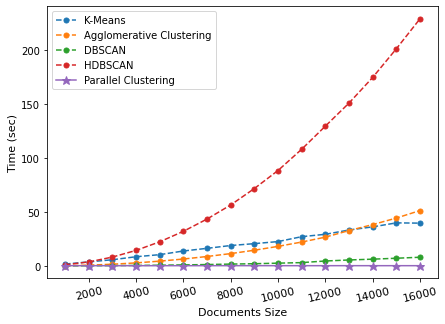

In [ ]:
plt.figure(figsize=(7, 5))
x = [i for i in range(1000, 16001, 1000)]
n = 16
plt.plot(x, time_dict['KMEAN'][:n], label='K-Means', marker='o', linestyle='--', markersize=5)
plt.plot(x, time_dict['Agglomerative'][:n], label='Agglomerative Clustering', marker='o',linestyle='--', markersize=5)
plt.plot(x, time_dict['DBSCAN'][:n], label='DBSCAN', marker='o', linestyle='--' , markersize=5)
plt.plot(x, time_dict['HDBSCAN'][:n], label='HDBSCAN', marker='o', linestyle='--' , markersize=5)
plt.plot(x, time_dict['Parallel'][:n], label='Parallel Clustering', marker='*',linestyle='-', markersize=9)

plt.xlabel('Documents Size', size=11)
plt.ylabel('Time (sec)', size=11)
#plt.title("Documents(Movies Dataset) Clustering Time", size=15)
plt.legend()
plt.xticks(rotation=13, size=11)
plt.show()

### 5-2. Speed (1/Time)

In [ ]:
speed_dict = dict()
for key, time in time_dict.items():
    speed_dict[key] = [1/s for s in time]

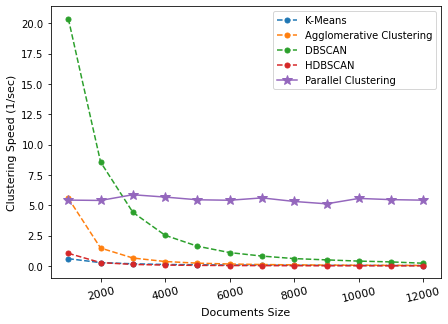

In [ ]:
plt.figure(figsize=(7, 5))
x = [i for i in range(1000, 12001, 1000)]
n = 12
plt.plot(x, speed_dict['KMEAN'][:n], label='K-Means', marker='o', linestyle='--', markersize=5)
plt.plot(x, speed_dict['Agglomerative'][:n], label='Agglomerative Clustering', marker='o',linestyle='--', markersize=5)
plt.plot(x, speed_dict['DBSCAN'][:n], label='DBSCAN', marker='o', linestyle='--' , markersize=5)
plt.plot(x, speed_dict['HDBSCAN'][:n], label='HDBSCAN', marker='o', linestyle='--' , markersize=5)
plt.plot(x, speed_dict['Parallel'][:n], label='Parallel Clustering', marker='*',linestyle='-', markersize=10)

plt.xlabel('Documents Size', size=11)
plt.ylabel('Clustering Speed (1/sec)', size=11)
#plt.title("Documents(Movies Dataset) Clustering Time", size=15)
plt.legend()
plt.xticks(rotation=13, size=11)
plt.show()